In [1]:
#pip install seaborn

In [2]:
#pip install matplotlib

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df1=pd.DataFrame(
    {
        "emp_id":[1,2,3,4],
        "name":["Alice","Bob","Charlie","David"]
    }
)
print(df1)
df2=pd.DataFrame(
    {
        "id":[1,2,3,4],
        "name":["Alice","Bob","Charlie","David"]
    }
)
print(df2)
df3=pd.DataFrame(
    {
        "id":[2,3,5],
        "salary":[50000,60000,45000]
    }
)
print(df3)

   emp_id     name
0       1    Alice
1       2      Bob
2       3  Charlie
3       4    David
   id     name
0   1    Alice
1   2      Bob
2   3  Charlie
3   4    David
   id  salary
0   2   50000
1   3   60000
2   5   45000


In [5]:
df4=pd.merge(df2,df3,on="id",how="inner") #["",""]
df4

,id,name,salary
0,2,Bob,50000
1,3,Charlie,60000


In [6]:
df5=pd.merge(df1,df3,left_on="emp_id",right_on="id")
df5

,emp_id,name,id,salary
0,2,Bob,2,50000
1,3,Charlie,3,60000


In [7]:
df=pd.read_csv("data.csv")
df.head() # ipl

,year,match_id,team,runs_scored,players,wickets_taken
0,2017,755,Delhi Capitals,236,"Player_2, Player_22, Player_85, Player_58, Pla...",6
1,2015,268,Gujarat Titans,61,"Player_68, Player_41, Player_77, Player_78, Pl...",8
2,2009,965,Delhi Capitals,69,"Player_17, Player_47, Player_99, Player_40, Pl...",5
3,2014,488,Gujarat Titans,96,"Player_93, Player_60, Player_41, Player_61, Pl...",2
4,2023,439,Kolkata Knight Riders,244,"Player_7, Player_9, Player_25, Player_42, Play...",0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           250 non-null    int64 
 1   match_id       250 non-null    int64 
 2   team           250 non-null    object
 3   runs_scored    250 non-null    int64 
 4   players        250 non-null    object
 5   wickets_taken  250 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 11.8+ KB


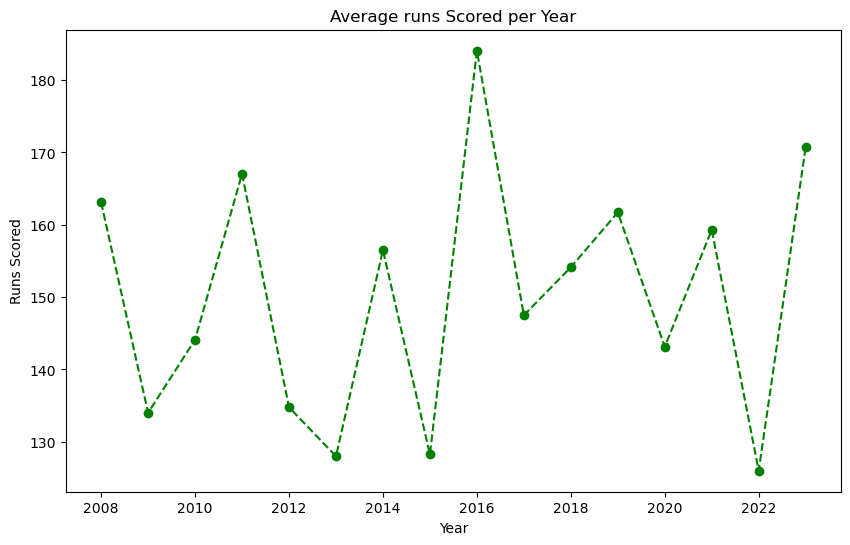

In [9]:
#line plot
# average runs scored per year
avg_runs_per_year=df.groupby("year")["runs_scored"].mean()
plt.figure(figsize=(10,6))
plt.plot(avg_runs_per_year.index,avg_runs_per_year.values,color="green",linestyle="--",marker="o")
plt.title("Average runs Scored per Year",fontsize=12)
plt.xlabel("Year")
plt.ylabel("Runs Scored")
plt.show()
# insights -- 

In [10]:
avg_runs_per_year.index

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023],
      dtype='int64', name='year')

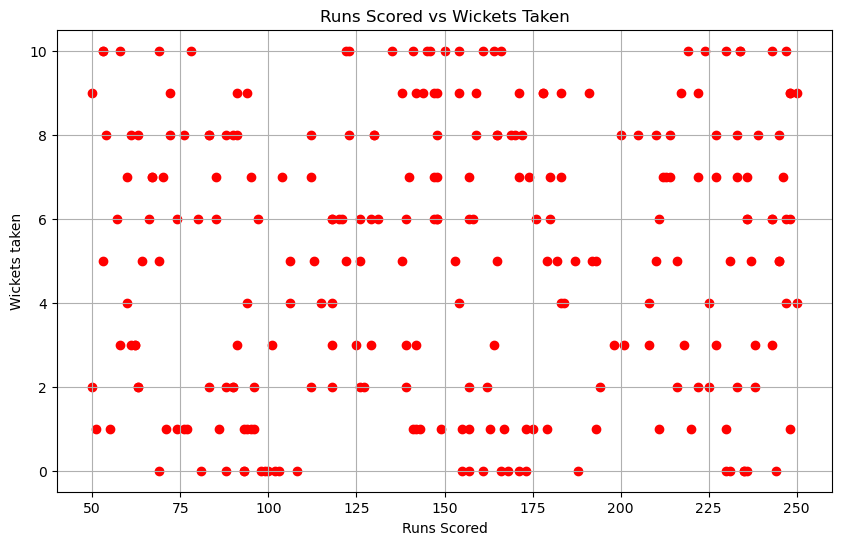

In [11]:
# scatter plot : Runs Scored vs Wickets Taken
plt.figure(figsize=(10,6))
plt.scatter(df["runs_scored"],df["wickets_taken"],color="red")
plt.title("Runs Scored vs Wickets Taken",fontsize=12)
plt.xlabel("Runs Scored")
plt.ylabel("Wickets taken")
plt.grid()
plt.show()
#

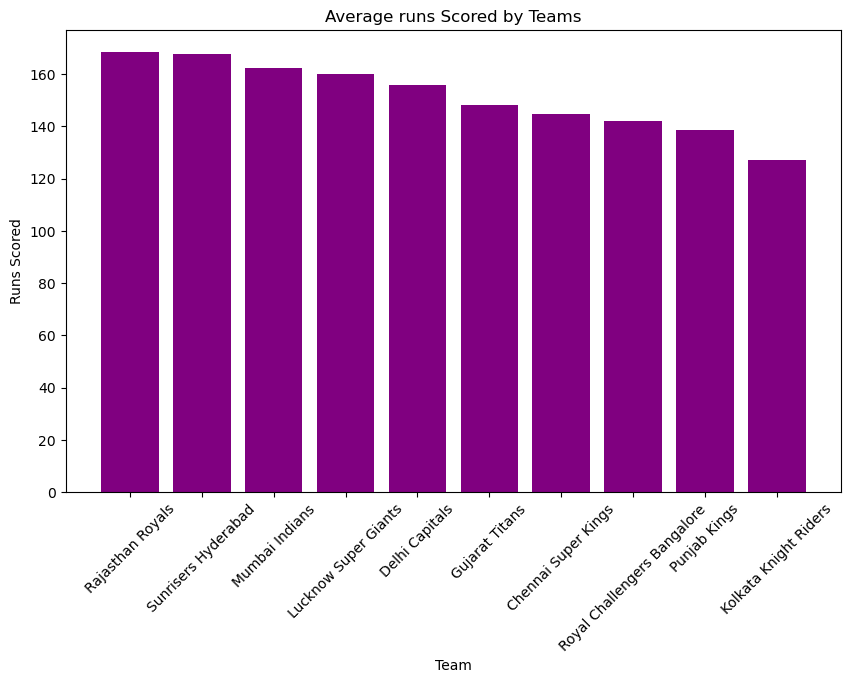

In [12]:
# Average runs Scored by Teams
avg_runs_per_team=df.groupby("team")["runs_scored"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(avg_runs_per_team.index,avg_runs_per_team.values,color="purple")
plt.title("Average runs Scored by Teams",fontsize=12)
plt.xlabel("Team")
plt.ylabel("Runs Scored")
plt.xticks(rotation=45)
plt.show()
#

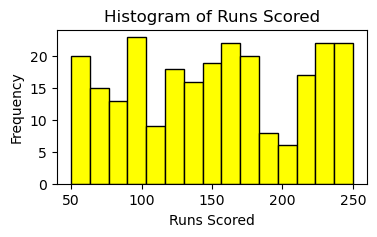

In [13]:
#Histogram: Distribution of runs_scored
plt.figure(figsize=(4,2))
plt.hist(df["runs_scored"],bins=15,edgecolor="black",color="yellow")
plt.title("Histogram of Runs Scored")
plt.xlabel("Runs Scored")
plt.ylabel("Frequency")
plt.show()

<Figure size 1000x700 with 0 Axes>

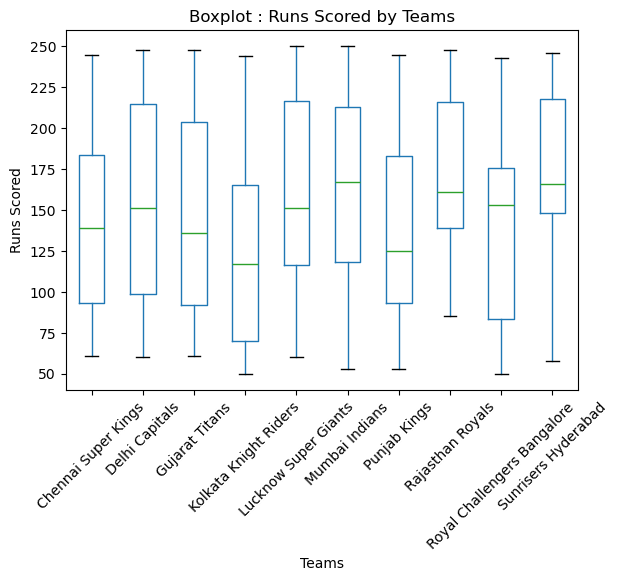

In [14]:
# boxplot : Runs Scored by Teams
plt.figure(figsize=(10,7))
df.boxplot(column="runs_scored",by="team",grid=False)
plt.suptitle("") # removes by default title given by Pandas
plt.title("Boxplot : Runs Scored by Teams")
plt.xlabel("Teams")
plt.ylabel("Runs Scored")
plt.xticks(rotation=45)
plt.show()

In [15]:
#------------------------------------------------------------------------ Seaborn--------------

In [16]:
df.head()

,year,match_id,team,runs_scored,players,wickets_taken
0,2017,755,Delhi Capitals,236,"Player_2, Player_22, Player_85, Player_58, Pla...",6
1,2015,268,Gujarat Titans,61,"Player_68, Player_41, Player_77, Player_78, Pl...",8
2,2009,965,Delhi Capitals,69,"Player_17, Player_47, Player_99, Player_40, Pl...",5
3,2014,488,Gujarat Titans,96,"Player_93, Player_60, Player_41, Player_61, Pl...",2
4,2023,439,Kolkata Knight Riders,244,"Player_7, Player_9, Player_25, Player_42, Play...",0


<Figure size 1000x1000 with 0 Axes>

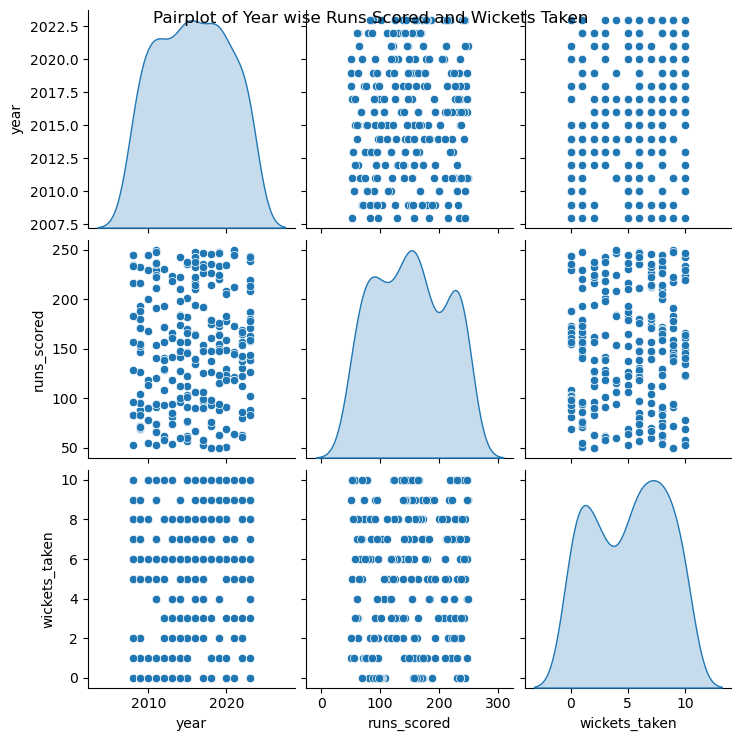

In [17]:
plt.figure(figsize=(10,10))
sns.pairplot(df[["year","runs_scored","wickets_taken"]],diag_kind="kde")
plt.suptitle("Pairplot of Year wise Runs Scored and Wickets Taken")
plt.show() # kernel density estimate

In [18]:
#heatmap
df.dtypes

year              int64
match_id          int64
team             object
runs_scored       int64
players          object
wickets_taken     int64
dtype: object

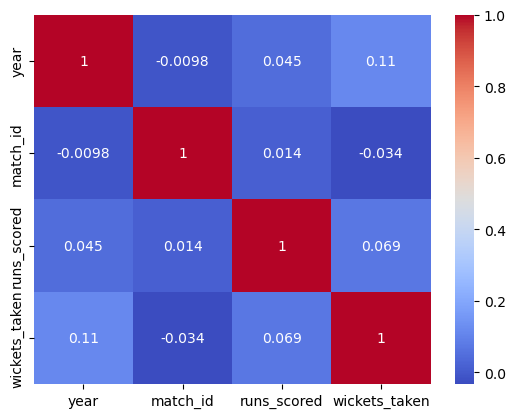

In [19]:
# heatmap
cols=df.select_dtypes("int").columns
df[cols].corr()
sns.heatmap(df[cols].corr(),annot=True,cmap="coolwarm")
plt.show()
#

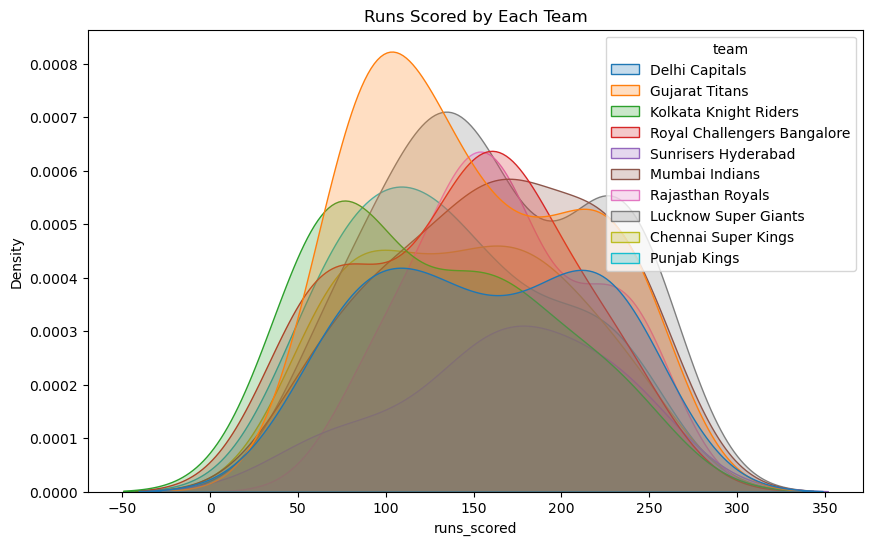

In [20]:
# kde map
plt.figure(figsize=(10,6))
sns.kdeplot(data=df,x="runs_scored",hue="team",fill=True)
plt.title("Runs Scored by Each Team")
plt.show()
# insights


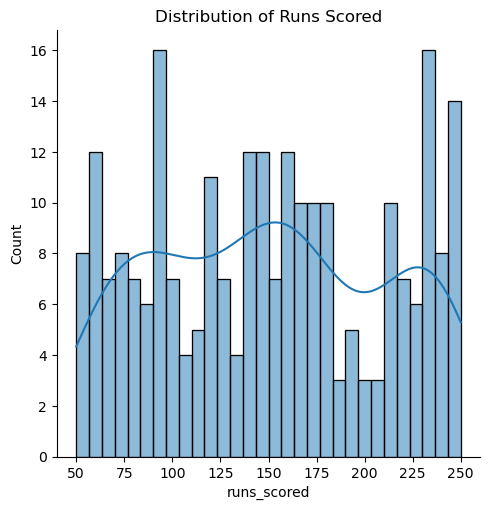

In [21]:
# displot --  distribution plot
sns.displot(data=df,x="runs_scored",kde=True,bins=30)
plt.title("Distribution of Runs Scored")
plt.show()

<Axes: xlabel='runs_scored', ylabel='wickets_taken'>

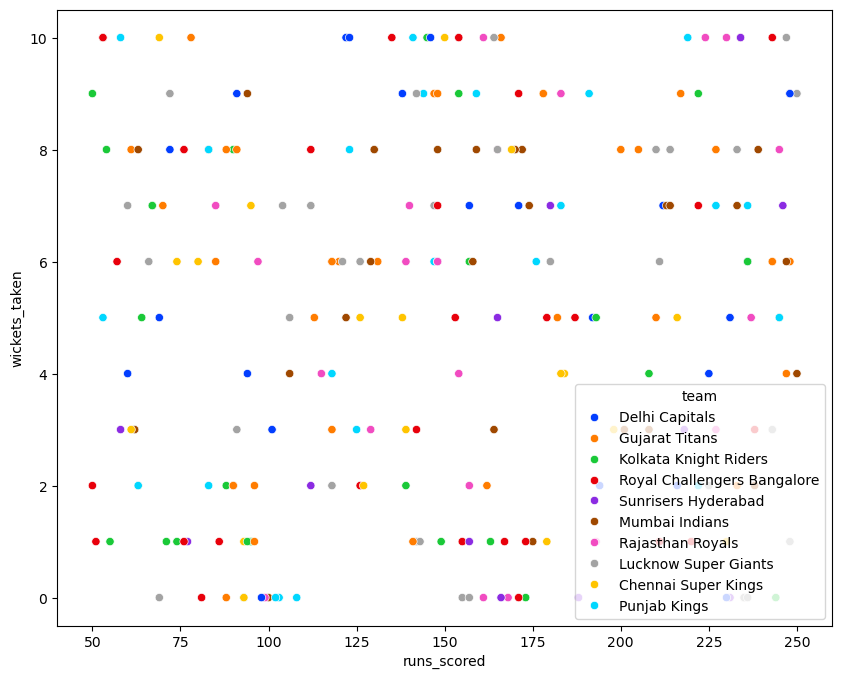

In [22]:
# scatterplot
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x="runs_scored",y="wickets_taken",palette="bright",hue="team")

In [61]:
df.dtypes

year              int64
match_id          int64
team             object
runs_scored       int64
players          object
wickets_taken     int64
dtype: object

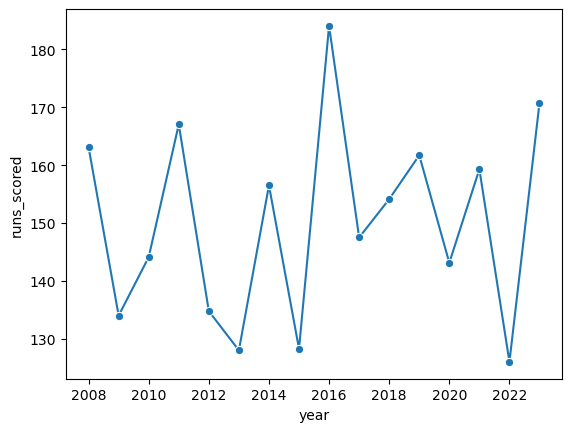

In [67]:
# lineplot
x=df.groupby("year")["runs_scored"].mean()
sns.lineplot(x,marker="o")
plt.show()

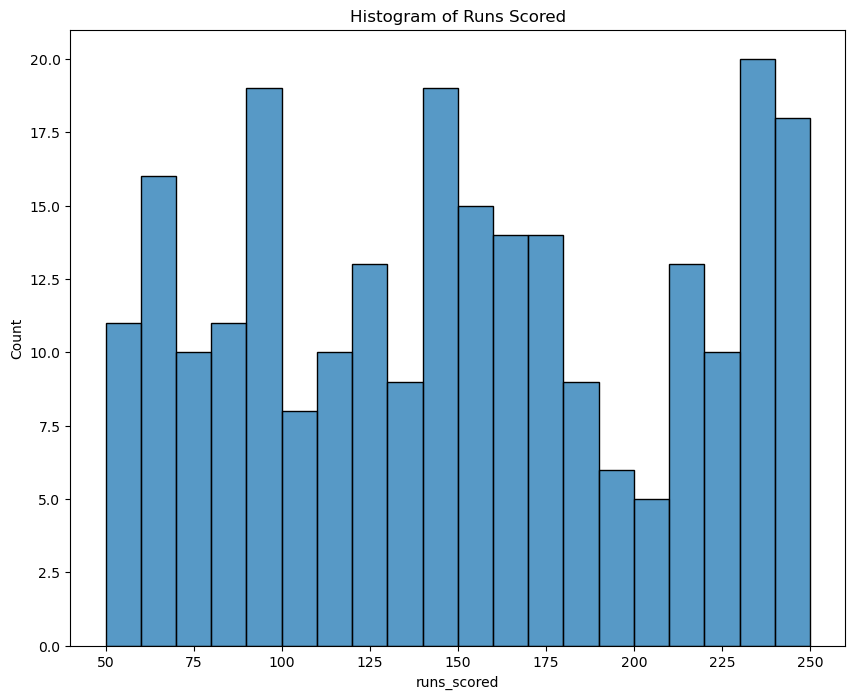

In [77]:
# histogram plot
plt.figure(figsize=(10,8))
sns.histplot(data=df,x="runs_scored",bins=20,kde=False)
plt.title("Histogram of Runs Scored")
plt.show()
# Empirical rule
# standard deviation


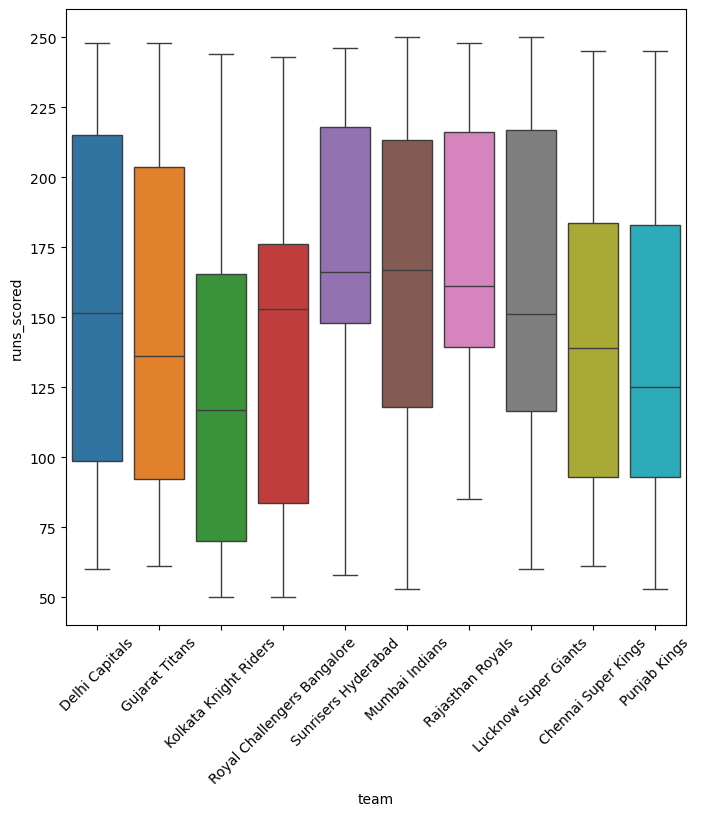

In [95]:
# boxplot  
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x="team",y="runs_scored",hue="team")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

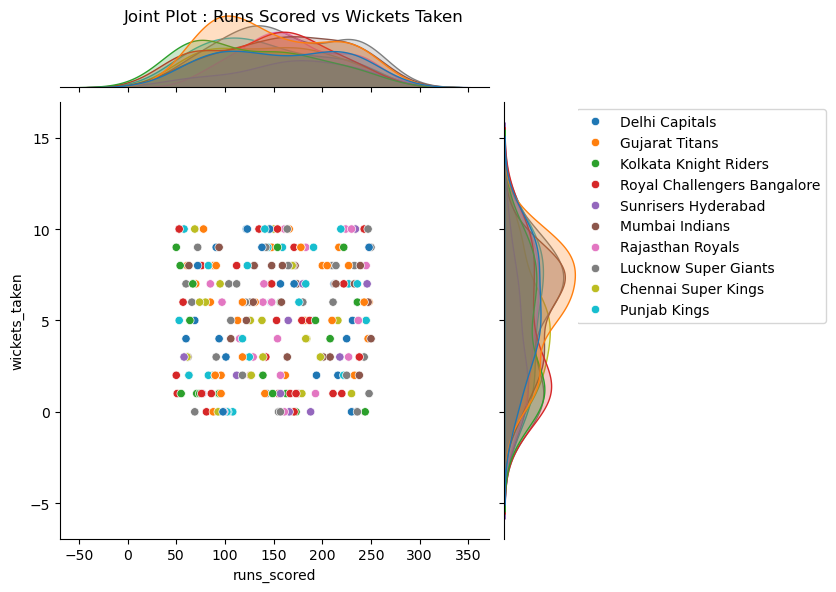

In [135]:
# jointplot
plt.figure(figsize=(10,6))
sns.jointplot(data=df,x="runs_scored",y="wickets_taken",hue="team",kind="scatter",color="purple")
plt.legend(bbox_to_anchor=(1.8,1),loc="upper right")
plt.suptitle("Joint Plot : Runs Scored vs Wickets Taken")
plt.show()
#bbox_to_anchor 

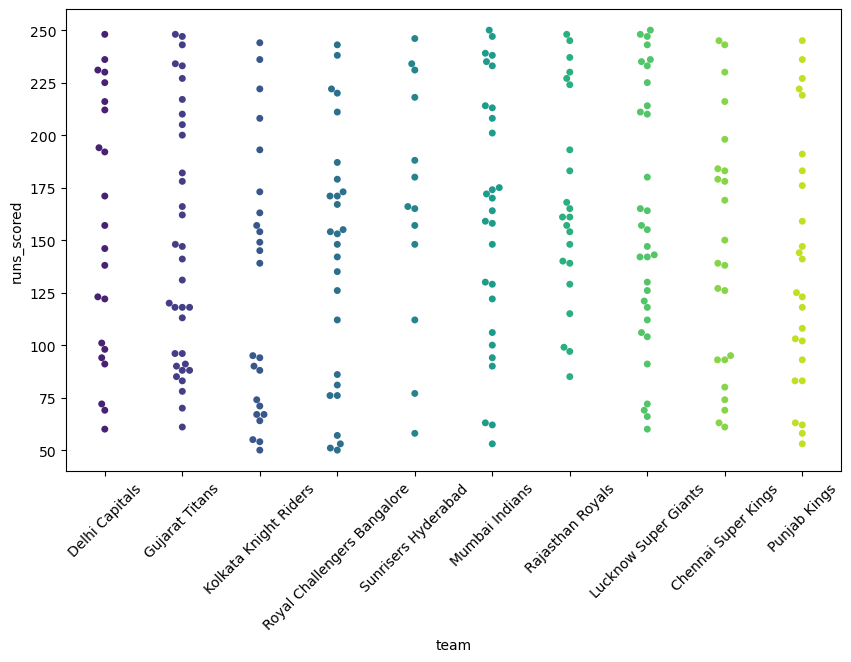

In [143]:
# swarm plot
plt.figure(figsize=(10,6))
sns.swarmplot(data=df,x="team",y="runs_scored",palette="viridis",hue="team")
plt.xticks(rotation=45)
plt.show()

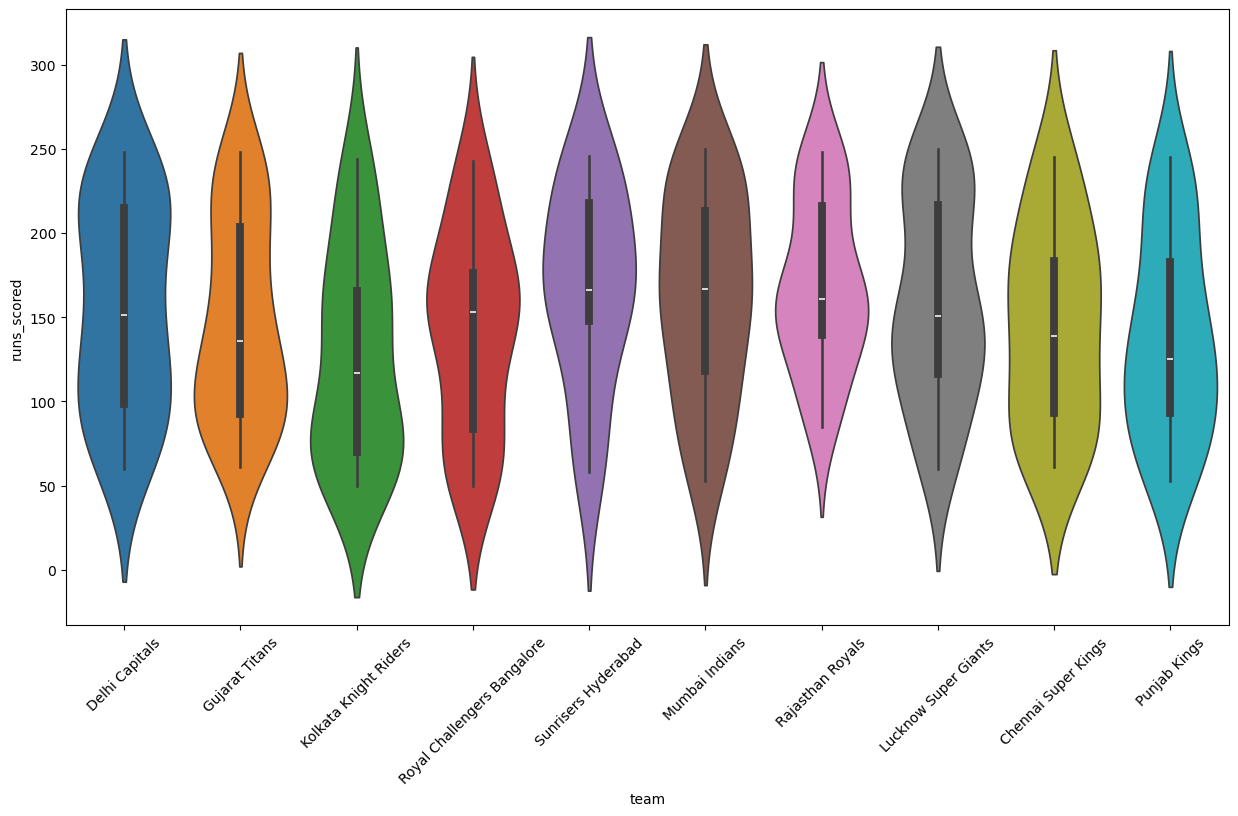

In [151]:
# swarm plot
plt.figure(figsize=(15,8))
sns.violinplot(data=df,x="team",y="runs_scored",hue="team") #,palette="viridis"
plt.xticks(rotation=45)
plt.show()

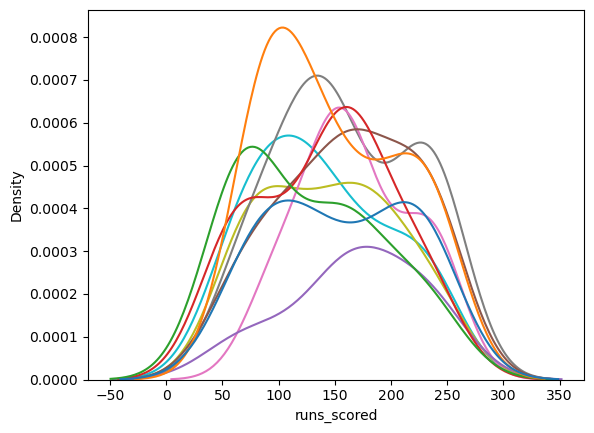

In [163]:
# kde plot
sns.kdeplot(data=df,x="runs_scored",hue="team",legend=False)# fill=True
plt.show()

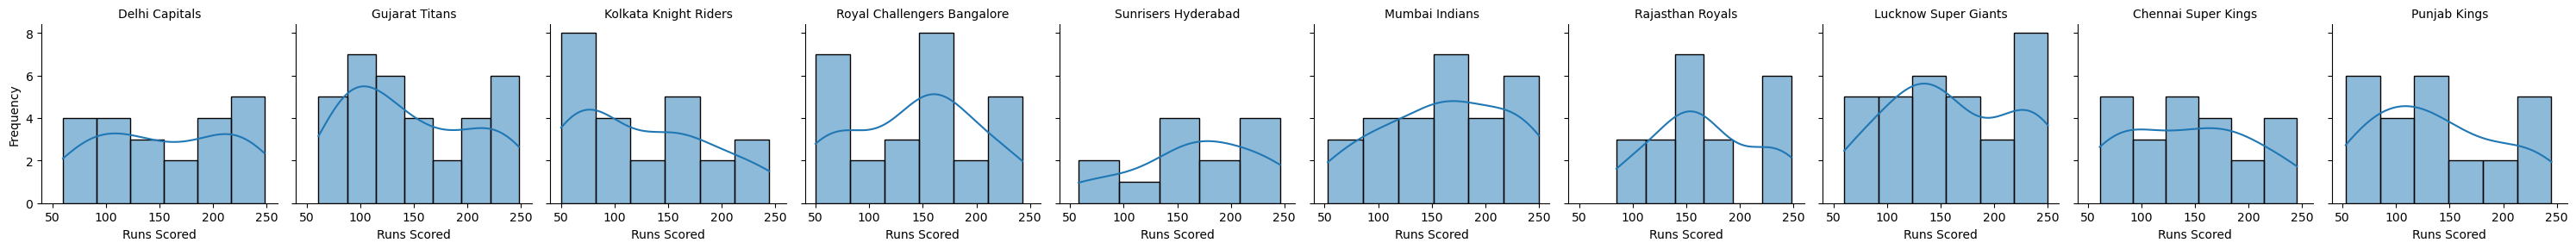

In [185]:
# FacetGrid
g=sns.FacetGrid(data=df,col="team")
g.map(sns.histplot,"runs_scored",kde=True)
g.set_titles("{col_name}")
g.set_axis_labels("Runs Scored","Frequency")
plt.show()

In [187]:
from mpl_toolkits.mplot3d import Axes3D # axes in matplotlib

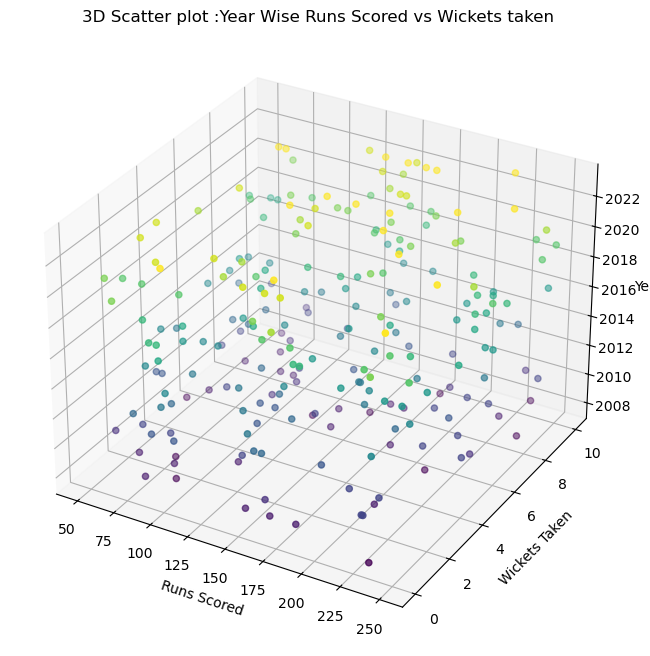

In [207]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(projection='3d')
scatter=ax.scatter(
    df["runs_scored"],
    df["wickets_taken"],
    df["year"],
    c=df["year"]
)
ax.set_xlabel("Runs Scored")
ax.set_ylabel("Wickets Taken")
ax.set_zlabel("Year")
ax.set_title("3D Scatter plot :Year Wise Runs Scored vs Wickets taken")
plt.show()
'''

'''